## Импортируем нужные библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split

## Создаем и визуализируем данные

In [2]:
num=40
X = np.random.randn(num,1)
Y = 2 + X + 2*X**2 + np.random.randn(num,1)

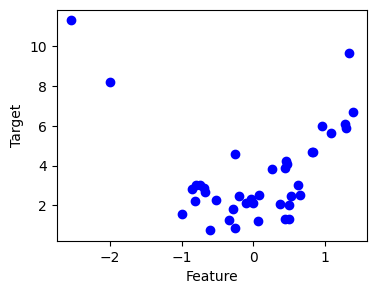

In [3]:
fig = plt.figure(figsize=(4,3))
plt.plot(X, Y, 'ob')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Обучаем алгоритм линейной регрессии

In [4]:
# Метод нормального уравнения
lr = LinearRegression()
lr.fit(X,Y)
ypred = lr.predict(X)

In [5]:
lr.intercept_, lr.coef_

(array([3.5477794]), array([[0.06313859]]))

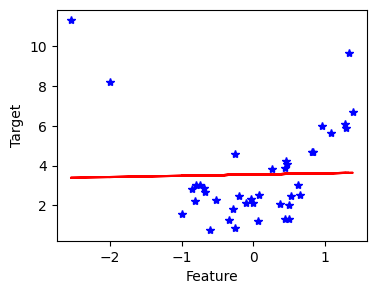

In [6]:
fig = plt.figure(figsize=(4,3))
plt.plot(X, Y, '*b')
plt.plot(X, ypred, '-r')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [7]:
# Метод градиентного спуска
sgd = SGDRegressor(verbose=1)
sgd.fit(X,Y)
ypred = sgd.predict(X)

-- Epoch 1
Norm: 0.04, NNZs: 1, Bias: 0.638731, T: 40, Avg. loss: 7.975801
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.05, NNZs: 1, Bias: 1.031433, T: 80, Avg. loss: 6.501501
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 1, Bias: 1.331955, T: 120, Avg. loss: 5.610643
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 1, Bias: 1.575409, T: 160, Avg. loss: 4.998411
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.08, NNZs: 1, Bias: 1.779828, T: 200, Avg. loss: 4.548338
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.08, NNZs: 1, Bias: 1.954993, T: 240, Avg. loss: 4.206635
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.08, NNZs: 1, Bias: 2.105779, T: 280, Avg. loss: 3.943205
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.09, NNZs: 1, Bias: 2.238889, T: 320, Avg. loss: 3.734902
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.09, NNZs: 1, Bias: 2.355724, T: 360, Avg. loss: 3.568766
Total training time: 0.00 seconds.
-- 

/home/masvel/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
SGDRegressor

sklearn.linear_model._stochastic_gradient.SGDRegressor

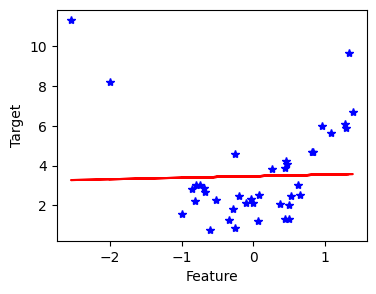

In [11]:
fig = plt.figure(figsize=(4,3))
plt.plot(X, Y, '*b')
plt.plot(X, ypred, '-r')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Создадим полиномиальные признаки и проведен нормировку данных

In [12]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [13]:
#создание полиномиальных признаков
pf = PolynomialFeatures(degree=30, include_bias=False)
Xpoly = pf.fit_transform(X)

Xtest = np.linspace(-4,4,1000).reshape(1000,1)
Xtest_poly = pf.transform(Xtest)

In [14]:
X.shape, Xpoly.shape, Xtest_poly.shape

((40, 1), (40, 30), (1000, 30))

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xpoly)
X_test_scaled = scaler.transform(Xtest_poly)

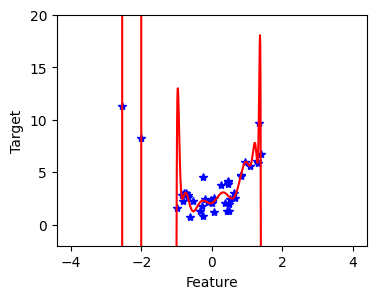

In [16]:
lr = LinearRegression(fit_intercept=True)
lr.fit(Xpoly,Y)
ypred = lr.predict(Xtest_poly)
ytrain_pred = lr.predict(Xpoly)

fig = plt.figure(figsize=(4,3))
plt.plot(X, Y, '*b')
plt.plot(Xtest, ypred, '-r')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.ylim(-2,20)
plt.show()

In [17]:
lr.coef_

array([[   1.46027176,   16.77082999,   -3.96385161, -143.5572412 ,
          46.41715121,  350.34633283, -158.92162973, -152.62644366,
          60.75322975, -205.0186808 ,  174.29981269,  -37.60926677,
          82.77831289,   79.19860464,  -82.33334433,  100.12082434,
        -177.32531274,   81.69052474, -138.05986812,   62.80530847,
          -2.24717784,   20.44220766,  116.69979785,  -83.5875815 ,
         108.33789147, -161.33273801,  -22.15364352,   85.57714613,
          -4.21541407,  -10.89322693]])

## Обучение моделей с регуляризацией

In [18]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [19]:
ridge = Ridge(alpha=10^4)

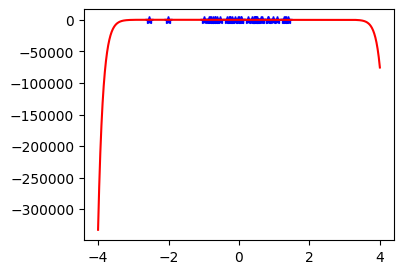

In [20]:
ridge.fit(X_scaled,Y)
ypred = ridge.predict(X_test_scaled)
ytrain_pred = ridge.predict(X_scaled)

fig = plt.figure(figsize=(4,3))
plt.plot(X, Y, '*b')
plt.plot(Xtest, ypred, '-r')
#plt.plot(Xtest, ypred, '-r')
plt.show()

In [21]:
ridge.coef_

array([[ 0.66025915,  1.08360122,  0.11289166,  0.48811486, -0.0924447 ,
         0.22572939, -0.09459531,  0.11106203, -0.06095942,  0.05373112,
        -0.03107234,  0.0219722 , -0.01020398,  0.00332586,  0.00334705,
        -0.00794536,  0.01191124, -0.01485314,  0.01726484, -0.01911385,
         0.02059619, -0.0217496 ,  0.02266518, -0.02338233,  0.02394911,
        -0.02439438,  0.0247456 , -0.02502189,  0.02523963, -0.02541102]])

In [22]:
ridgecv = RidgeCV(alphas=np.linspace(1,10^5,100))

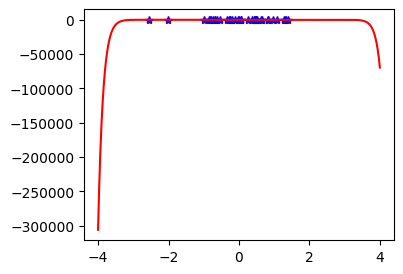

In [23]:
ridgecv.fit(X_scaled,Y)
ypred = ridgecv.predict(X_test_scaled)
ytrain_pred = ridgecv.predict(X_scaled)

fig = plt.figure(figsize=(4,3))
plt.plot(X, Y, '*b')
plt.plot(Xtest, ypred, '-r')
#plt.plot(Xtest, ypred, '-r')
plt.show()

In [24]:
ridgecv.alpha_

15.0

In [25]:
ridgecv.coef_

array([[ 0.64554015,  1.05202351,  0.10717779,  0.47532893, -0.09176334,
         0.22075587, -0.09349071,  0.10934111, -0.06066721,  0.05359094,
        -0.03156077,  0.02269447, -0.01124685,  0.00455057,  0.00194235,
        -0.0064181 ,  0.01027752, -0.01314081,  0.0154879 , -0.01728746,
         0.01873013, -0.01985268,  0.02074378, -0.02144174,  0.02199336,
        -0.02242672,  0.02276854, -0.02303744,  0.02324936, -0.02341617]])

In [26]:
lassocv = Lasso(alpha=1)

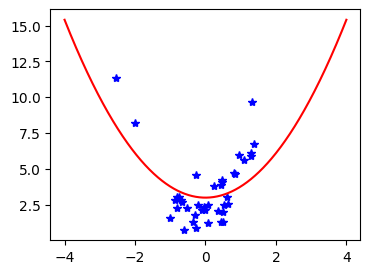

In [27]:
lassocv.fit(X_scaled,Y)
ypred = lassocv.predict(X_test_scaled)
ytrain_pred = lassocv.predict(X_scaled)

fig = plt.figure(figsize=(4,3))
plt.plot(X, Y, '*b')
plt.plot(Xtest, ypred, '-r')
#plt.plot(Xtest, ypred, '-r')
plt.show()

In [28]:
lassocv.intercept_, lassocv.coef_

(array([3.55019404]),
 array([ 0.        ,  0.92315483, -0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ,
        -0.        ,  0.        , -0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ,
        -0.        ,  0.        , -0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ]))

## Домашнее задание

Обучить полиномиальную регрессию, построить зависимость предсказанного от реального значения и рассчитать ошибку (всё для обучающей и тестовой выборок) для датасета сталей и предсказать предел текучести (0.2% Proof Stress (MPa)) на основании состава и температуры. Для большого числа признаков использовать регуляризацию. Постараться достичь минимально возможной ошибки на тестовой выборке. 

По желанию можно использовать кросс-валидацию для расчет метрики ошибки и поиск по сетке для подбора параметров регуляризации. Также можно самим реализовать алгоритм градиентного спуска и с его помощью рассчитать ошибку.

In [59]:
import pandas as pd
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor


sns.set_style('darkgrid')
sns.set_palette('Set2')

In [31]:
df = pd.read_csv('./Databases/Steels_kaggle.csv')

In [35]:
target_class = ' 0.2% Proof Stress (MPa)'
y = df[target_class]
X = df.drop(np.hstack([df.columns[0], df.columns[16:]]), axis=1)


0.8232512032002752

In [61]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

pipe = make_pipeline(PolynomialFeatures(degree=6, include_bias=False), StandardScaler(), ElasticNet(alpha=1))
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

/home/masvel/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.536e+04, tolerance: 1.294e+03
  model = cd_fast.enet_coordinate_descent(


0.9153033418803658

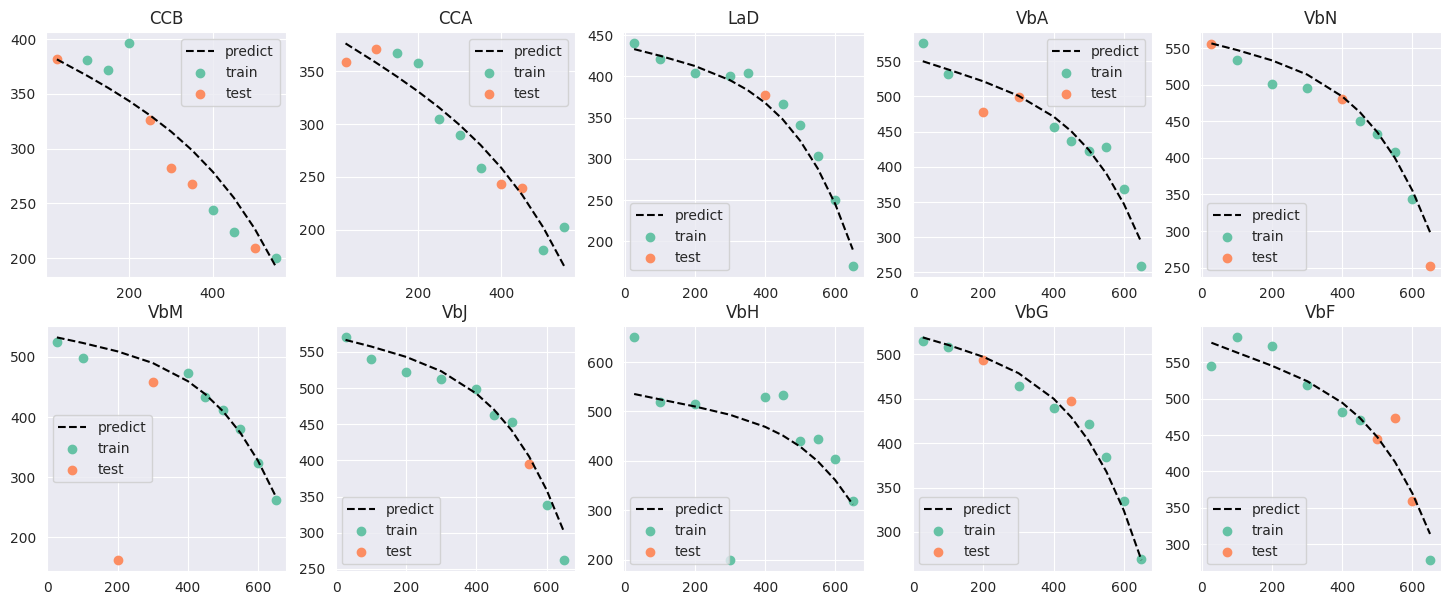

In [62]:
alloys = df['Alloy code'].value_counts().index[:10]

df_train = df.iloc[X_train.index]
df_test = df.iloc[X_test.index]

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(18, 7))

for alloy_label, i in zip(alloys, range(10)):
    alloy = df[df['Alloy code'] == alloy_label]
    alloy_test = df_test[df_test['Alloy code'] == alloy_label]
    alloy_train = df_train[df_train['Alloy code'] == alloy_label]
    ax = axs[i // 5][i % 5]
    # ax.scatter(alloy[' Temperature (°C)'], alloy[' 0.2% Proof Stress (MPa)'])
    ax.plot(alloy[' Temperature (°C)'], pipe.predict(X[df['Alloy code'] == alloy_label]), c='k', linestyle='--', label='predict')
    ax.scatter(alloy_train[' Temperature (°C)'], alloy_train[' 0.2% Proof Stress (MPa)'], label='train')
    ax.scatter(alloy_test[' Temperature (°C)'], alloy_test[' 0.2% Proof Stress (MPa)'], label='test')
    ax.set_title(alloy_label)
    ax.legend()